# Problema 2
Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Se define una función que realiza las operaciones sobre las imagenes y retorna una tupla con las operaciones realizadas.

In [2]:
def image_operations(image1, image2):
    binarized_img1 = binarize_image(image1)
    binarized_img2 = binarize_image(image2)
    height = image1.shape[0]
    width = image1.shape[1]

    result_add = np.zeros((height, width, 3))
    result_sub = np.zeros((height, width, 3))
    result_and = np.zeros((height, width, 1))
    result_or  = np.zeros((height, width, 1))
    result_xor = np.zeros((height, width, 1))
    
    for j in range(0,height):
        for i in range(0,width):
            result_add[j,i][0] = check_pixel_value(int(image1[j,i][0]) + int(image2[j,i][0]))
            result_add[j,i][1] = check_pixel_value(int(image1[j,i][1]) + int(image2[j,i][1]))
            result_add[j,i][2] = check_pixel_value(int(image1[j,i][2]) + int(image2[j,i][2]))
            
            result_sub[j,i][0] = check_pixel_value(int(image1[j,i][0]) - int(image2[j,i][0]))
            result_sub[j,i][1] = check_pixel_value(int(image1[j,i][1]) - int(image2[j,i][1]))
            result_sub[j,i][2] = check_pixel_value(int(image1[j,i][2]) - int(image2[j,i][2]))

            result_and[j,i] = int(binarized_img1[j,i]) & int(binarized_img2[j,i])
            result_or[j,i]  = int(binarized_img1[j,i]) | int(binarized_img2[j,i])
            result_xor[j,i] = int(binarized_img1[j,i]) ^ int(binarized_img2[j,i])
            
    return result_add, result_sub, result_and, result_or, result_xor

In [3]:
def check_pixel_value(pixel):
    if(pixel > 255):
        return 255
    if (pixel < 0):
        return 0

    return pixel

In [4]:
def binarize_image(input_image):
    height = input_image.shape[0]
    width = input_image.shape[1]
    
    gray_scale_image = gray_scale(input_image)
    binarized_image = np.zeros((height,width,1))

    summatory = 0
    for j in range(0,height):
        for i in range(0,width):
            summatory += gray_scale_image[j,i]

    average = int(summatory/(width*height))

    for j in range(0,height):
        for i in range(0,width):
            if gray_scale_image[j,i] < average:
                binarized_image[j,i] = 0
            else:

                binarized_image[j,i] = 255

    return binarized_image

def gray_scale(input_image):
    height = input_image.shape[0]
    width = input_image.shape[1] 
    

    gray_image = np.zeros((height, width, 1))

    for j in range(0,height):
        for i in range(0,width):
            pixel = input_image[j,i]
            blue = pixel[0]
            green = pixel[1]
            red = pixel[2]
            gray_image[j,i] = int(0.114 * blue + 0.587 * green  + 0.299 * red)

    return gray_image

### Imagenes Originales

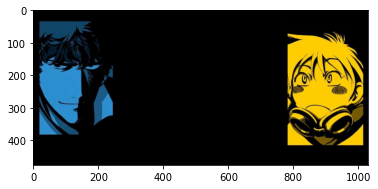

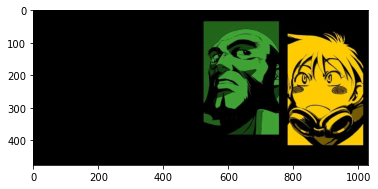

In [5]:
input_image1 = cv2.imread("./images/imagen1.jpg", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(input_image1, cv2.COLOR_BGR2RGB))
plt.show()

input_image2 = cv2.imread("./images/imagen2.jpg", cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(input_image2, cv2.COLOR_BGR2RGB))
plt.show()

### Operaciones con Imágenes

In [6]:
op_suma, op_resta, op_and, op_or, op_xor = image_operations(input_image1,input_image2)

### Operación Suma

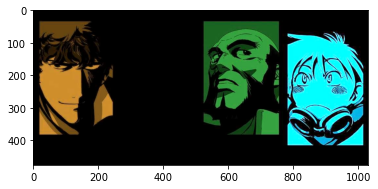

In [7]:
output_file = "./images/suma.jpg"

cv2.imwrite(output_file, op_suma )
plt.imshow(cv2.imread(output_file, cv2.IMREAD_COLOR))
plt.show()

### Operación Resta

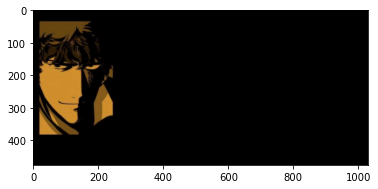

In [8]:
output_file = "./images/resta.jpg"

cv2.imwrite(output_file, op_resta )
plt.imshow(cv2.imread(output_file, cv2.IMREAD_COLOR))
plt.show()

### Operación AND

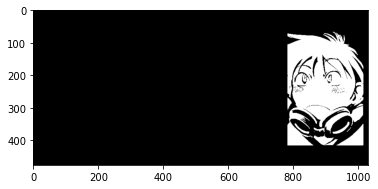

In [9]:
output_file = "./images/and.jpg"

cv2.imwrite(output_file, op_and )
plt.imshow(cv2.imread(output_file, cv2.COLOR_BGR2GRAY),cmap='gray')
plt.show()

### Operación OR

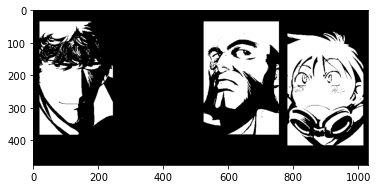

In [10]:
output_file = "./images/or.jpg"

cv2.imwrite(output_file, op_or )
plt.imshow(cv2.imread(output_file, cv2.COLOR_BGR2GRAY),cmap='gray')
plt.show()

### Operación XOR

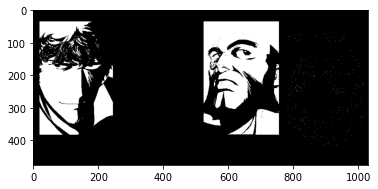

In [11]:
output_file = "./images/xor.jpg"

cv2.imwrite(output_file, op_xor )
plt.imshow(cv2.imread(output_file, cv2.COLOR_BGR2GRAY),cmap='gray')
plt.show()